TRABAJO PRACTICO 3 - DAVID QUIJADA HERNÁNDEZ
---

1.- Convolución discreta.
---
Una señal finita de N muestras se escribe como un vector:

$$
x = \begin{bmatrix}
x[0]\\
x[1]\\
.\\
.\\
.\\
x[N-1]\\
\end{bmatrix} \in \mathbb{C}^{N} 
$$

Usando la convolución circular, un operador lineal y homogéneo en el tiempo se puede expresar como:

$$ y = x \circledast h = C_{h}^{o}x $$, 

donde $C_{h}^{0} \in \mathcal{M}_{\mathbb{C}}(N,N)$ es una matriz de convolución parametrizada por el vector h, la respuesta impulsional del filtro.

Debido a los efectos de bordes, la convolución circular $\circledast$ es poco utilizada en algoritmos de la vida real. Se ocupa en su reemplazo la convolución discreta donde las dos señales son "rellenadas" (padding en inglés) con ceros fuera del intervalo de muestreo:

$$
\tilde{x}[n] = \left\{ \begin{array}{lcc}
                     x[n] & si & 0 \leq n < N \\
                     0 & e.o.c \\
                     \end{array}
             \right. ,\quad \tilde{x} \in \mathbb{C}^{2N-1}
$$

$$
\tilde{h}[n] = \left\{ \begin{array}{lcc}
                      h[n] & si & 0 \leq n < N \\
                      0 & e.o.c \\
                      \end{array}
               \right. , \quad \tilde{h} \in \mathbb{C}^{2N-1}.
$$

Escribimos luego:

$$ y = x * h = C_{h}x $$

donde $C_{h} \in \mathcal{M}_{\mathbb{C}}(2N-1,N)$

a.- Dada una respuesta impulsional h, escriba las matrices $C_{h}$ y $C_{h}^{0}$. Pruebe que $C_{h}$ es una matriz de Toeplitz y $C_{h}^{o}$ es una matriz circulante.

Respuesta.-

Sea h la matriz de respuesta impulsional definida de la siguiente forma:\\

$$ h(n) = \begin{equation}
\begin{bmatrix}
h[0] \\
h[1] \\
. \\
. \\
. \\
h[N-1]
\end{bmatrix}
\end{equation}
$$

Usando convolución se obtiene que:

   $$
   C_{h} = \begin{equation}
   \begin{bmatrix}
    h[0] & 0 &  \cdots & 0\\\\
    h[1] & h[0] &  \cdots & 0 \\\\
    h[2] & h[1] & \ddots  & \vdots\\\\
    \vdots & \ddots & \ddots & h[0]\\\\
    h[N-1] & h[N-2] &\ddots & h[1] \\\\
    0 & h[N-1] & \cdots & h[2] \\\\
    \vdots & \vdots & \ddots & \vdots \\\\
    0 & 0 & \cdots & h[N-1]
    \end{bmatrix}
    \end{equation}
    $$
    
En particular, podemos notar que las diagonales son iguales en cada una de sus posiciones, por lo tanto es una matriz de Toeplitz.

Por otro lado, utilizando la convolución circular, se obtendrá lo siguiente:

$$
C_{h}^{o} = \begin{equation}
    \begin{bmatrix}
    h[0] & h[N-1] & \cdots & h[1]\\\\
    h[1] & h[0] & \cdots & h[2] \\\\
    \vdots & \vdots & \ddots & \cdots \\\\
    h[N-1] & h[N-2] & \cdots & h[0]
    \end{bmatrix}
    \end{equation}
    $$

En este caso, la particularidad corre en el sentido de que según la fila en la que nos ubicamos los valores de h[n] se van desplazando, es decir, es una matriz circular.

b.- Ahora estudiaremos los efectos de borde de la convolución circular.

2.- Transformadas de Fourier Discreta (DFT) y Rápida (FFT)
---


La DFT es un operador lineal que se puede representar como una matriz $F_{N}=[e_{0}, ..., e_{N-1}]^{T} \in \mathcal{M}_{\mathbb{C}}(N,N)$, donde e_{k} \in \mathbb{C}^{N} es la k-ésima función de la base de Fourier:

$$
(F_{N})_{k, p} = e_{k}[p] = e^{i\frac{2\pi (p-1)}{N}(k-1)
$$.

2.1 Funciones básicas y transformada discreta de Fourier (DFT)

a.- Calcule las funciones de base de Fourier $e_{k}$ para todos los índices k para una señal de tamaño N = 32. Trazar sus partes reales e imaginarias en una figura.

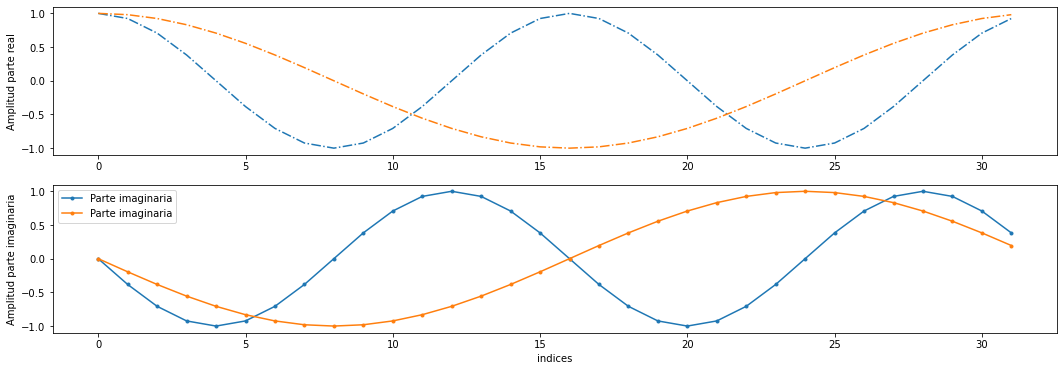

In [8]:
#Comenzamos llamando las librerías 

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import sounddevice as sd
import pylab as pl
from scipy.io import wavfile
from scipy import signal
from scipy.linalg import dft
import time



#Comenzamos fijando el valor dado
N = 32
#Llamamos las gráficas
fig, axes = plt.subplots(2,1,figsize=(18,6))


t = np.arange(0,N,1)

#Comenzamos a calcular las funciones.

for k in range (N-2,N):
    f_k = k/N
    w_k = 2*np.pi*f_k
    e_k = np.exp(1j*w_k*t)
    o1 = axes[0].plot(t,np.real(e_k), '-.', label = 'Parte real')
    o2 = axes[1].plot(t,np.imag(e_k),'.-', label = 'Parte imaginaria')

    
#Finalmente graficamos

axes[0].set_ylabel('Amplitud parte real')
plt.legend()
axes[1].set_xlabel('indices')
plt.legend()
axes[1].set_ylabel('Amplitud parte imaginaria');

b.- Calcule $F_{N}$ la matriz de transformada discreta de Fourier (DFT) para N = 1, 2, 4 y 32. Para N = 32 visualice las partes reales e imaginarias como una imagen. ¿Qué contienen las líneas de la matriz $F_{N}$?

In [13]:
#Creamos la función
def M_DFT(N):
    F_N = np.zeros(shape = (N,N),dtype=complex)
    omega_N = np.exp(1j*2*np.pi/N)
    for i in range(N):
        for j in range(N):
            F_N[i,j]=omega_N**(i*j)
    return F_N

M_DFT(1)

array([[1.+0.j]])

In [14]:
M_DFT(2)


array([[ 1.+0.0000000e+00j,  1.+0.0000000e+00j],
       [ 1.+0.0000000e+00j, -1.+1.2246468e-16j]])

In [15]:
M_DFT(4)


array([[ 1.0000000e+00+0.0000000e+00j,  1.0000000e+00+0.0000000e+00j,
         1.0000000e+00+0.0000000e+00j,  1.0000000e+00+0.0000000e+00j],
       [ 1.0000000e+00+0.0000000e+00j,  6.1232340e-17+1.0000000e+00j,
        -1.0000000e+00+1.2246468e-16j, -1.8369702e-16-1.0000000e+00j],
       [ 1.0000000e+00+0.0000000e+00j, -1.0000000e+00+1.2246468e-16j,
         1.0000000e+00-2.4492936e-16j, -1.0000000e+00+3.6739404e-16j],
       [ 1.0000000e+00+0.0000000e+00j, -1.8369702e-16-1.0000000e+00j,
        -1.0000000e+00+3.6739404e-16j,  5.5109106e-16+1.0000000e+00j]])

In [21]:
M_DFT(32)

array([[ 1.        +0.j        ,  1.        +0.j        ,
         1.        +0.j        , ...,  1.        +0.j        ,
         1.        +0.j        ,  1.        +0.j        ],
       [ 1.        +0.j        ,  0.98078528+0.19509032j,
         0.92387953+0.38268343j, ...,  0.83146961-0.55557023j,
         0.92387953-0.38268343j,  0.98078528-0.19509032j],
       [ 1.        +0.j        ,  0.92387953+0.38268343j,
         0.70710678+0.70710678j, ...,  0.38268343-0.92387953j,
         0.70710678-0.70710678j,  0.92387953-0.38268343j],
       ...,
       [ 1.        +0.j        ,  0.83146961-0.55557023j,
         0.38268343-0.92387953j, ..., -0.19509032+0.98078528j,
         0.38268343+0.92387953j,  0.83146961+0.55557023j],
       [ 1.        +0.j        ,  0.92387953-0.38268343j,
         0.70710678-0.70710678j, ...,  0.38268343+0.92387953j,
         0.70710678+0.70710678j,  0.92387953+0.38268343j],
       [ 1.        +0.j        ,  0.98078528-0.19509032j,
         0.92387953-0.38268343

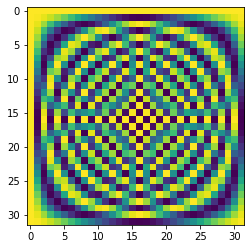

In [22]:
#Para graficar parte real
F_32 = M_DFT(32)
pl.imshow(np.real(F_32))

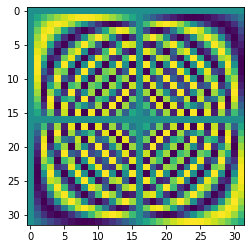

In [23]:
#Parte imaginaria
pl.imshow(np.imag(F_32))

c.- Para una señal de largo N = 1024 tal que: 

$$
x[n] = cos(2\pi f_{0} n)
$$

Con $f_{0} = \frac{k}{N}$ para k < $\frac{N}{2}$ un entero positivo, calcule la matriz $F_{N}$ y aplíquela a la señal x. Visualice luego la magnitud del resultado en el dominio frecuencial. 

In [37]:
def obt_xhat(N, f0):
    w_0 = 2*np.pi*f0
    t = np.arange(0,N,1)
    x = np.sin(w_0*t)
    F_N = sp.linalg.dft(N)
    xhat = (1/N)*F_N.dot(x)
    w = np.arange(-1/2,1/2,1/N)
    
    return t, x, w, xhat, w_0

Text(0.5, 0, 'Frecuencia [Hz]')

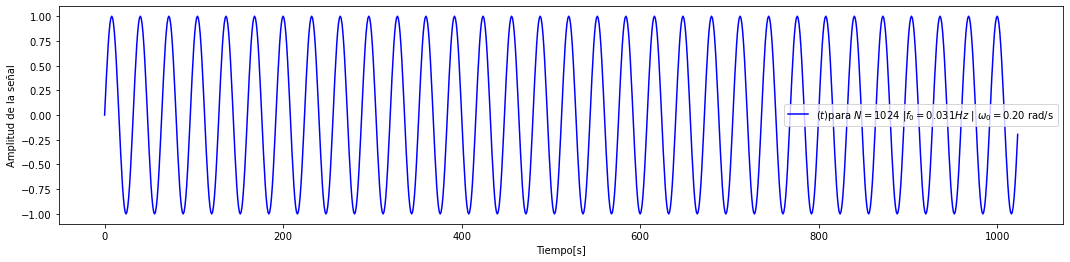

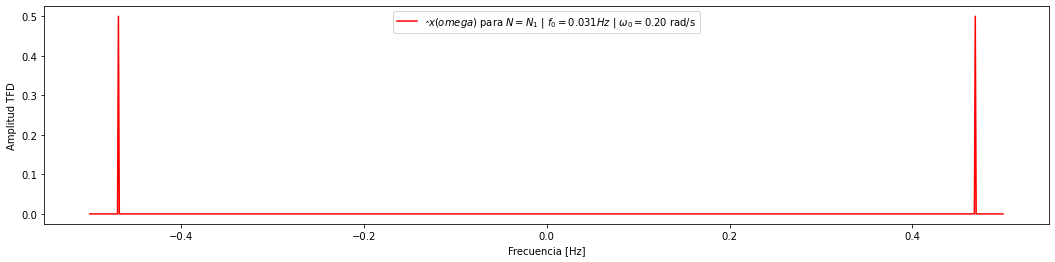

In [43]:
N_1 = 1024
k_1 = 32
f0_1 = k_1/N_1
t1, x1, w1, xhat1, w0_1 = obt_xhat(N_1,f0_1)

pl.figure(figsize = (18,4))
pl.plot(t1, x1, 'b-', label = f'$(t)$para $N = {N_1}$ |$f_{0} = {f0_1:.3f} Hz$ | $\omega_0={w0_1:.2f}$ rad/s')
pl.legend()
pl.ylabel('Amplitud de la señal')
pl.xlabel('Tiempo[s]')

pl.figure(figsize = (18, 4))
pl.plot(w1, np.abs(xhat1), 'r-', label = f'$\hat x(omega)$ para $ N = N_1$ | $f_0={f0_1:.3f} Hz$ | $\omega_0={w0_1:.2f}$ rad/s')
pl.legend()
pl.ylabel('Amplitud TFD')
pl.xlabel('Frecuencia [Hz]')

Cambie $f_{0}$ a un valor grande tal que k > N. ¿Qué sucede con el espectro?

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0, 'frecuencia[Hz]')

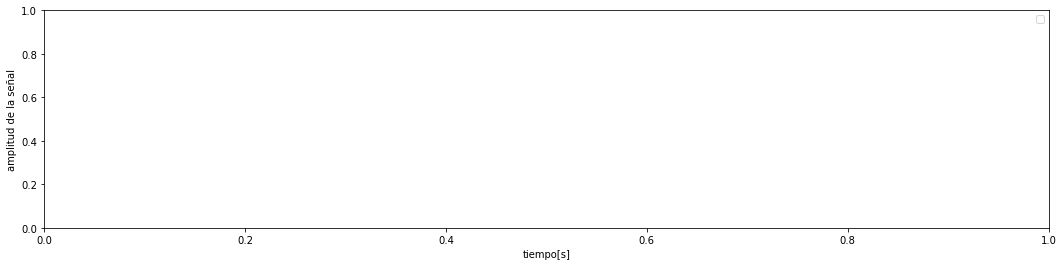

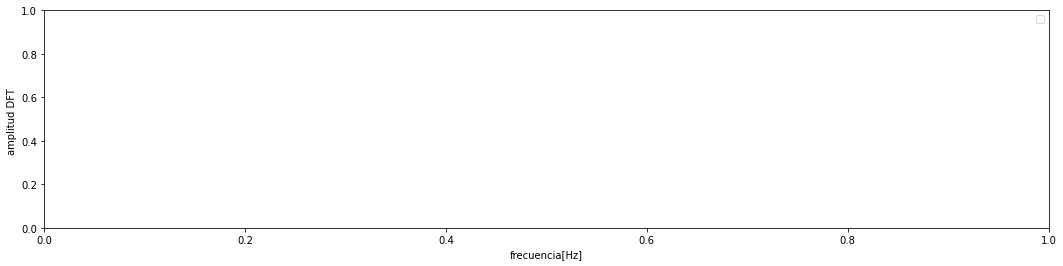

In [61]:
#Buscamos un k y un f_0
k = 1024*20
f_0 = k/N_1

#llamamos a la funcion antes definida.
t1, x1, w1, xhat1, w0_1 = obt_xhat(N_1,f0)

#grafico de la función en el lado temporal
pl.figure(figsize=(18,4))
pl.legend()
pl.ylabel("amplitud de la señal")
pl.xlabel("tiempo[s]")

#grafico de la funcion en el lado espectral
pl.figure(figsize=(18,4))
pl.legend()
pl.ylabel('amplitud DFT ')
pl.xlabel('frecuencia[Hz]')

3.- Interpretación de las señales
---
Para todas las señales que se describen a continuación, siga los siguientes pasos:

a.- Cargue la señal en la memoria y almacene tanto la señal x como la frecuencia de muestreo $f_{s}$

b.- Trace la señal en el tiempo con el eje adecuado (tiempo en segundos)

c.- Grafique la magnitud de la señal FFT con la frecuencia real correspondiente centrada alrededor del 0.

d.- Interprete y discuta las propiedades de la señal en frecuencia utilizando la información proporcionada sobre cada señal en la descripciones a continuación. Cuando sea posible, recupere parámetros físicos como la constante de tiempo de las frecuencias fundamentales de las señales cuando sea posible. Puede hacer zoom en parte de un gráfico utilizando pl.xlim.

Lista de señales y su nombre de archivo corrrespondiente. Algunas se han guardado en los trabajos prácticos anteriores y las demás se pueden descargar desde el repositorio github del curso. 

- A4.wav contiene la nota MIDI m = 69
- A4.clip.wav contiene la nota MIDI = m = 69 con el recorte correspondiente a un efecto de saturación.
- seq.wav contiene la secuencia de notas generadas en TP2
- Chirp.wav contiene una señal de modulación de frecuencia de chirp. ¿Cuáles son las frecuencias instantáneas en esta señal?¿Cuál es el soporte de su espectro?
- uku.wav y uku2.wav contienen una nota "mal" interpretada en ukelele.¿Cuáles son las notas tocadas?¿Cuáles son sus números MIDI correspondientes?
- drum.wav es una grabación de una ejecución de batería que contiene un bombo y un platillo, correspondientes respectivamente a una señal de baja frecuencia y alta frecuencia.
- stairway.wav y stairwayb.wav contiene 10 segundos del comienzo de una canción conocida. El segundo archivo ha sido dañado por ruido. Haga un zoom en las frecuencias bajas y encuentre el modo. ¿Cuál es la nota MIDI correspondiente a este modo que es la nota más tocada en la secuencia?¿Cuál es el soporte en frecuencia de ruido agregado?
- ecg.npz es la grabación de un electrocardiograma. ¿Puede ver el promedio de latidos por minuto en el espectro?¿Dónde está situado el ruido en el dominio de la frecuencia?
- conso.npz es el registro del uso eléctrico en Watts del edificio del centro de novación drahi-X con un período de muestreo de 1 min durante aproximadamente 4 semanas. Recupere los días y las semanas a partir de la señal. En el dominio de la frecuencia, haga zoom en las frecuencias bajas, en particular en aquellas correspondientes con periodicidad de 1 día y una semana.

sampling rate = 8000


Text(0, 0.5, 'amplitud señal')

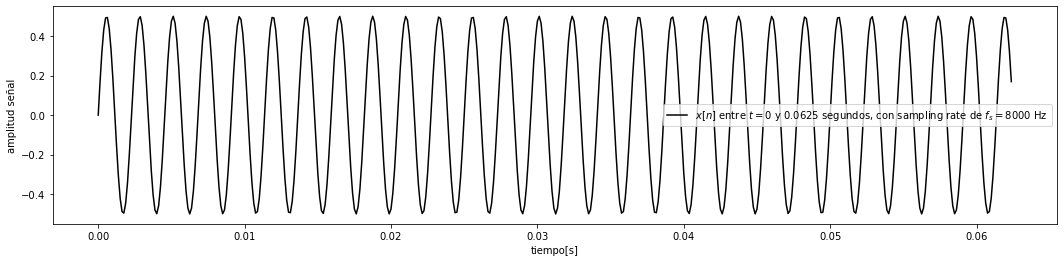

In [62]:
fs1,x1=wavfile.read('A4.wav')
print(f"sampling rate = {fs1}")
pl.figure(figsize=(18,4))
k=500
t=np.arange(0,len(x1)/fs1,1/fs1)
pl.plot(t[:k],x1[:k],'k-', label=f'$x[n]$ entre $t=0$ y ${k/fs1}$ segundos, con sampling rate de $f_s={fs1}$ Hz')
pl.legend()
pl.xlabel('tiempo[s]')
pl.ylabel('amplitud señal')

sampling rate = 8000


Text(0, 0.5, 'amplitud señal')

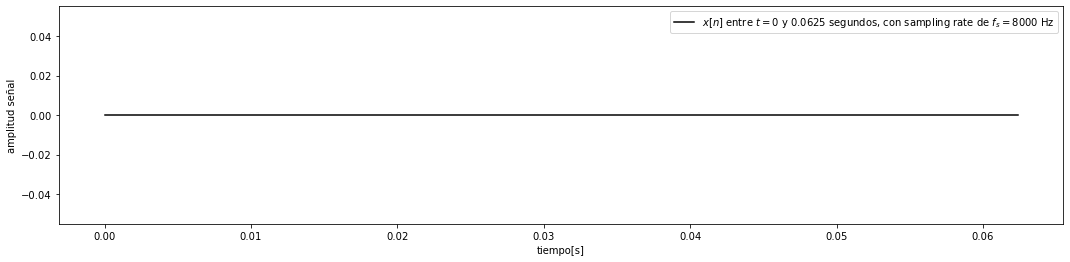

In [63]:
fs1,x1=wavfile.read('seq.wav')
print(f"sampling rate = {fs1}")
pl.figure(figsize=(18,4))
k=500
t=np.arange(0,len(x1)/fs1,1/fs1)
pl.plot(t[:k],x1[:k],'k-', label=f'$x[n]$ entre $t=0$ y ${k/fs1}$ segundos, con sampling rate de $f_s={fs1}$ Hz')
pl.legend()
pl.xlabel('tiempo[s]')
pl.ylabel('amplitud señal')

Como observación en esta gráfica se puede notar que finalmente en el TP2 no funcionó de forma adecuada el archivo seq.wav.

No handles with labels found to put in legend.


sampling rate = 8000


Text(0, 0.5, 'amplitud señal')

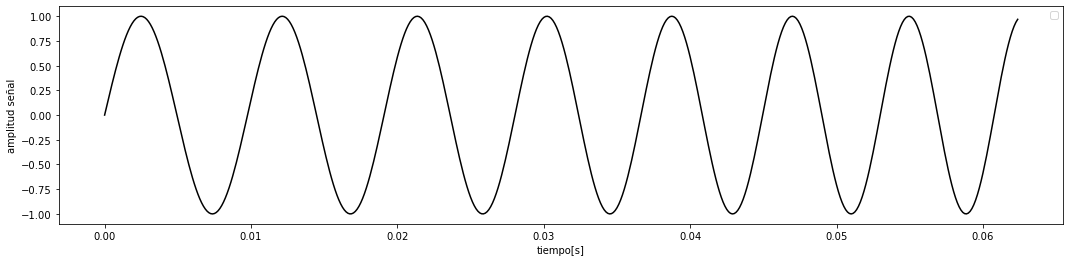

In [65]:
fs1,x1=wavfile.read('chirp.wav')
print(f"sampling rate = {fs1}")
pl.figure(figsize=(18,4))
k=500
t=np.arange(0,len(x1)/fs1,1/fs1)
pl.plot(t[:k],x1[:k],'k-')
pl.legend()
pl.xlabel('tiempo[s]')
pl.ylabel('amplitud señal')

sampling rate = 16000


Text(0, 0.5, 'amplitud señal')

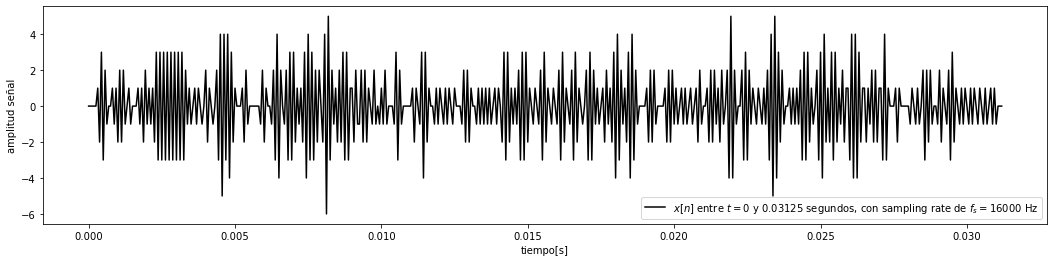

In [67]:
fs1,x1 = wavfile.read('TP3_data_uku_chords.wav')
print(f"sampling rate = {fs1}")
pl.figure(figsize = (18,4))
k = 500
t = np.arange(0,len(x1)/fs1,1/fs1)
pl.plot(t[:k],x1[:k],'k-', label=f'$x[n]$ entre $t=0$ y ${k/fs1}$ segundos, con sampling rate de $f_s={fs1}$ Hz')
pl.legend()
pl.xlabel('tiempo[s]')
pl.ylabel('amplitud señal')

sampling rate = 16000


Text(0, 0.5, 'amplitud señal')

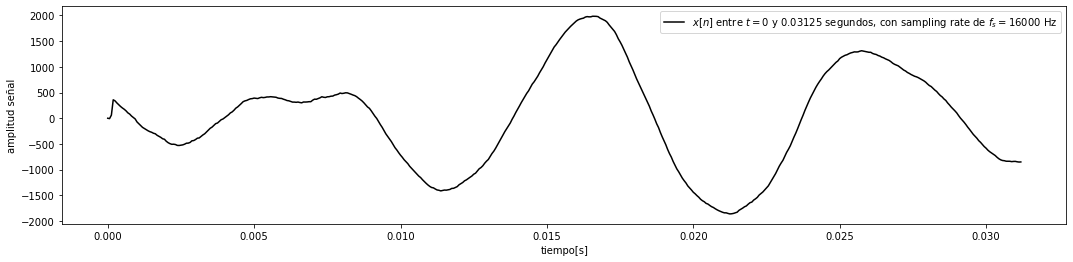

In [69]:
fs1,x1=wavfile.read('TP3_data_drum.wav')
print(f"sampling rate = {fs1}")
pl.figure(figsize=(18,4))
k=500
t=np.arange(0,len(x1)/fs1,1/fs1)
pl.plot(t[:k],x1[:k],'k-', label=f'$x[n]$ entre $t=0$ y ${k/fs1}$ segundos, con sampling rate de $f_s={fs1}$ Hz')
pl.legend()
pl.xlabel('tiempo[s]')
pl.ylabel('amplitud señal')

sampling rate = 44100


Text(0, 0.5, 'amplitud señal')

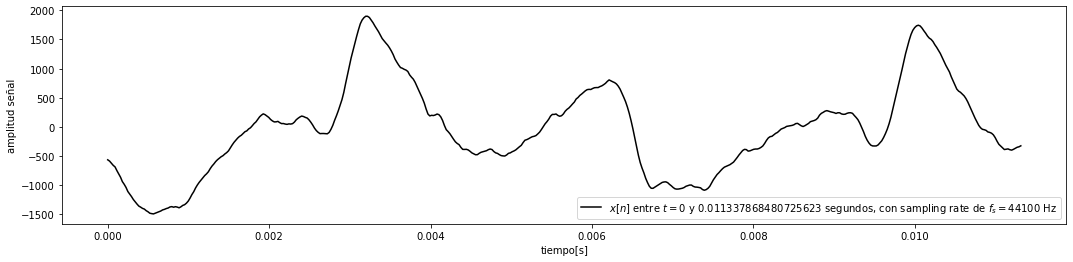

In [70]:
fs1,x1=wavfile.read('TP3_data_stairway.wav')
print(f"sampling rate = {fs1}")
pl.figure(figsize=(18,4))
k=500
t=np.arange(0,len(x1)/fs1,1/fs1)
pl.plot(t[:k],x1[:k],'k-', label=f'$x[n]$ entre $t=0$ y ${k/fs1}$ segundos, con sampling rate de $f_s={fs1}$ Hz')
pl.legend()
pl.xlabel('tiempo[s]')
pl.ylabel('amplitud señal')

sampling rate = 16000


Text(0, 0.5, 'amplitud señal')

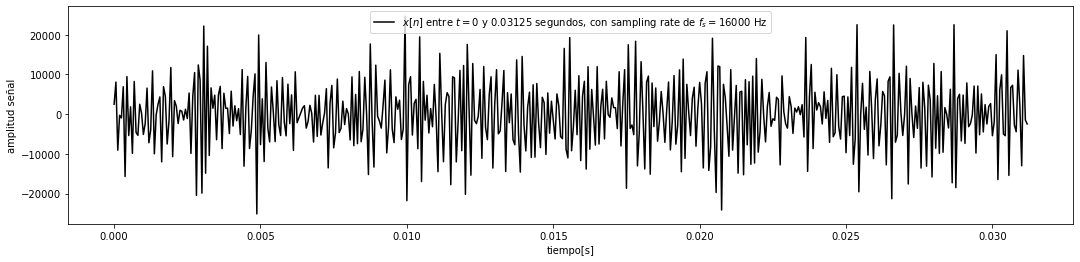

In [71]:
fs1,x1=wavfile.read('TP3_data_stairwayb.wav')
print(f"sampling rate = {fs1}")
pl.figure(figsize=(18,4))
k=500
t=np.arange(0,len(x1)/fs1,1/fs1)
pl.plot(t[:k],x1[:k],'k-', label=f'$x[n]$ entre $t=0$ y ${k/fs1}$ segundos, con sampling rate de $f_s={fs1}$ Hz')
pl.legend()
pl.xlabel('tiempo[s]')
pl.ylabel('amplitud señal')